# Assignment 2: Filters, Morphology and Geometric Transformation

By Ana María Garzón

Computer Vision, Universidad del Rosario

February 2023



In [1]:
# libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# images
img_1 = cv2.imread('Image_1.tif')
img_2 = cv2.imread('Image_2.png')
img_3 = cv2.imread('Image_3.tif')
bin_img_1 = cv2.imread('Binary_Image_1.jpg')
bin_img_2 = cv2.imread('Binary_Image_2.jpg')
bin_img_3 = cv2.imread('Binary_Image_3.jpg')
bin_img_4 = cv2.imread('Binary_Image_4.jpg')


**1. Filters**

a) Perform RGB filtering of image 1 with a 5x5 Gaussian Kernel and compare the result with the original image.


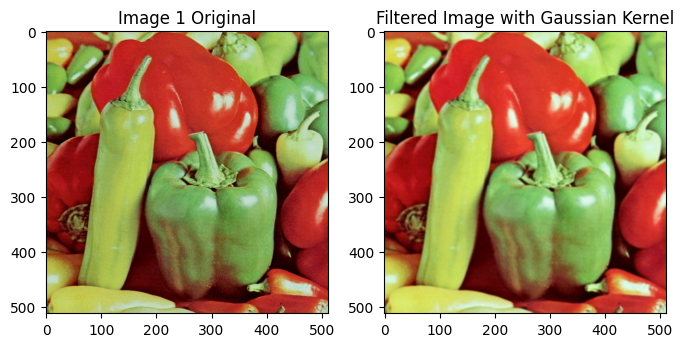

In [3]:
# Convert image from BGR to RGB
img_1_rgb = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)

# 5x5 Gaussian Kernel Creation
gaussian_kernel = np.matrix(([1,4,6,4,1],[4,16,24,16,4],[6,24,36,24,6],[4,16,41,26,7],[1,4,6,4,1]))/256

# Filtered Image with 5x5 Gaussian Kernel
img_1_filtered = cv2.filter2D(img_1_rgb,-1,gaussian_kernel)

# Compare Original Image with Created Image
plt.figure(figsize= (8, 4))
plt.subplot(121)
plt.title('Image 1 Original')
plt.imshow(img_1_rgb)
plt.subplot(122)
plt.title('Filtered Image with Gaussian Kernel')
plt.imshow(img_1_filtered)
plt.show()


As can be seen, the filtered image appears a little blurrier, brighter and with less defined edges than the original image.

b) Perform RGB filtering of image 1 with a 5x5 Gaussian Kernel using the cv2.GaussianBlur() function and compare the result with manual filtering.


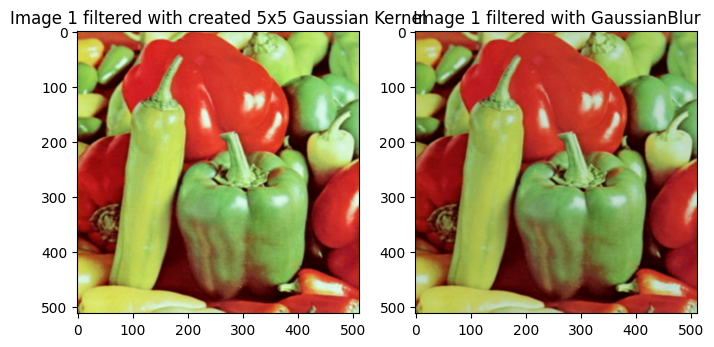

In [4]:
# Filtered Image with 5x5 Gaussian Kernel using cv2.GaussianBlur()
img_1_filtered_gBlur = cv2.GaussianBlur(img_1_rgb,(5,5),0)

# Comparating to manual filtering
plt.figure(figsize= (8, 4))
plt.subplot(121)
plt.title('Image 1 filtered with created 5x5 Gaussian Kernel')
plt.imshow(img_1_filtered)
plt.subplot(122)
plt.title('Image 1 filtered with GaussianBlur')
plt.imshow(img_1_filtered_gBlur)
plt.show()

As can be seen, the manually filtered image looks a little brighter than the image filtered with GaussianBlur. The second has more defined edges and preserves more of the original colors.

c) Perform grayscale filtering of image 2 with a median filter using the cv.2medianBlur() function and compare the result with the original image

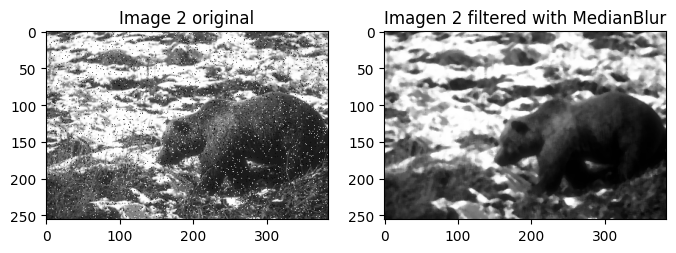

In [5]:
# Original Image in Gray Scale
img_2_gray = cv2.cvtColor(img_2, cv2.COLOR_BGR2GRAY)

# Filtered Image with Median Blur
img_2_gray_filtered = cv2.medianBlur(img_2_gray,5)

# Comparison
plt.figure(figsize= (8, 4))
plt.subplot(121)
plt.title('Image 2 original')
plt.imshow(img_2_gray, cmap = 'gray')
plt.subplot(122)
plt.title('Imagen 2 filtered with MedianBlur')
plt.imshow(img_2_gray_filtered,  cmap = 'gray')
plt.show()


Compared to the original image, the image filtered with MedianBlur has almost imperceptible noise, the edges are softer and the colors are more uniform.

d) Perform RGB filtering of image 1 with a bilateral filter using the cv2.bilateralFilter() function and compare the result with the original image. Additionally, explain what this type of filter consists of and why it is a nonlinear filter.


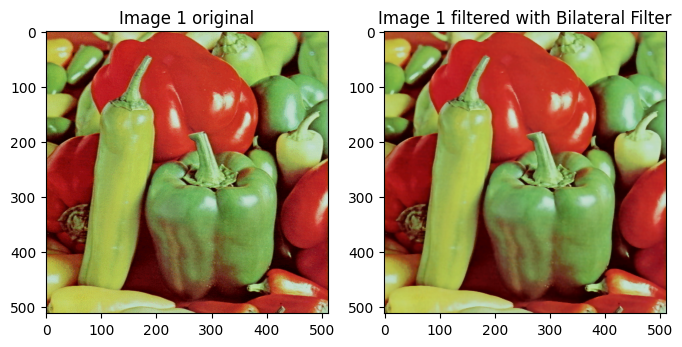

In [6]:
# Filtered Image with bilateral filter
img_1_filtered_bilateral = cv2.bilateralFilter(img_1_rgb, 5, 50, 50)

# Comparison with original image
plt.figure(figsize= (8, 4))
plt.subplot(121)
plt.title('Image 1 original')
plt.imshow(img_1_rgb)
plt.subplot(122)
plt.title('Image 1 filtered with Bilateral Filter')
plt.imshow(img_1_filtered_bilateral)
plt.show()

The bilateral filter is a filter that smoothes images, reducing noise while preserving the edges, which is what we can see in the image on the right. In a non-linear filter since the function it uses does not depend only on the Euclidean distance between pixel and pixel, but also on the radial distance; smoothing out differences in intensities and coordinates over time.

**2. Morphology**

a) Perform morphological operations to eliminate noise from binary image number 1, you must correctly select the structuring elements so that the size and shape of the objects (sets) remain the same.

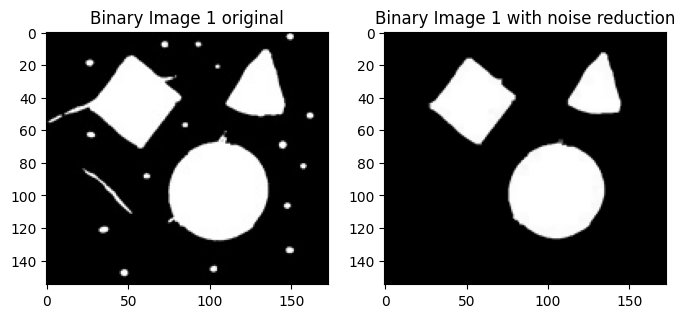

In [7]:
kernel = np.ones((3,3), np.uint8)
img_bin_red_ruido = cv2.erode(bin_img_1, kernel, iterations=2)
img_bin_red_ruido = cv2.dilate(img_bin_red_ruido, kernel, iterations=1)

# Original Image and Binary Image with Noise Reduction
plt.figure(figsize= (8, 4))
plt.subplot(121)
plt.title('Binary Image 1 original')
plt.imshow(bin_img_1)
plt.subplot(122)
plt.title('Binary Image 1 with noise reduction')
plt.imshow(img_bin_red_ruido)
plt.show()

b) Perform morphological operations to fill the gaps in binary image number 2, you must correctly select the structuring elements so that the size and shape of the objects (sets) remain the same.

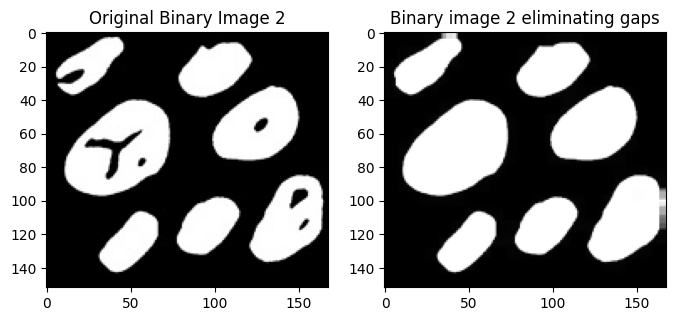

In [8]:
img_bin_no_hueco = cv2.morphologyEx(bin_img_2, cv2.MORPH_CLOSE, kernel, iterations=3)

# Imagen original e imagen con reducción de ruido
plt.figure(figsize= (8, 4))
plt.subplot(121)
plt.title('Original Binary Image 2')
plt.imshow(bin_img_2)
plt.subplot(122)
plt.title('Binary image 2 eliminating gaps')
plt.imshow(img_bin_no_hueco)
plt.show()

c) Perform morphological operations to separate the objects (sets) of binary image number 3, you must correctly select the structuring elements so that the size and shape of the objects (sets) remain the same.

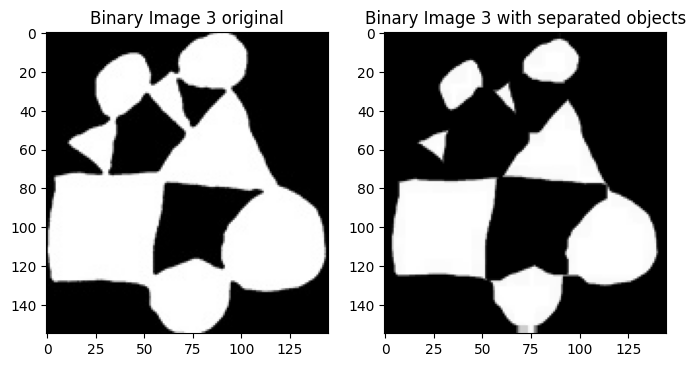

In [9]:
img_bin_separada = cv2.erode(bin_img_3, kernel, iterations=3)

# Imagen original e imagen con reducción de ruido
plt.figure(figsize= (8, 4))
plt.subplot(121)
plt.title('Binary Image 3 original')
plt.imshow(bin_img_3)
plt.subplot(122)
plt.title('Binary Image 3 with separated objects')
plt.imshow(img_bin_separada)
plt.show()

d) Perform morphological operations to extract the edge of binary image number 4, you must correctly select the structuring elements so that the size and shape of the objects (sets) remain the same.

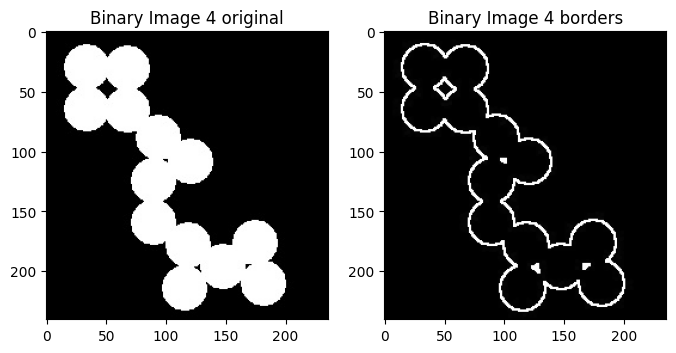

In [10]:
img_bin_borde = cv2.morphologyEx(bin_img_4, cv2.MORPH_GRADIENT, kernel, iterations=1)

# Original image and image with noise reduction
plt.figure(figsize= (8, 4))
plt.subplot(121)
plt.title('Binary Image 4 original')
plt.imshow(bin_img_4)
plt.subplot(122)
plt.title('Binary Image 4 borders')
plt.imshow(img_bin_borde)
plt.show()

**3. Geometric Tranformation**


In [11]:
img_3_rgb = cv2.cvtColor(img_3,cv2.COLOR_BGR2RGB)
M,N,C = img_3_rgb.shape

a) Rotate image 3 by 45° and adjust its visual plane.

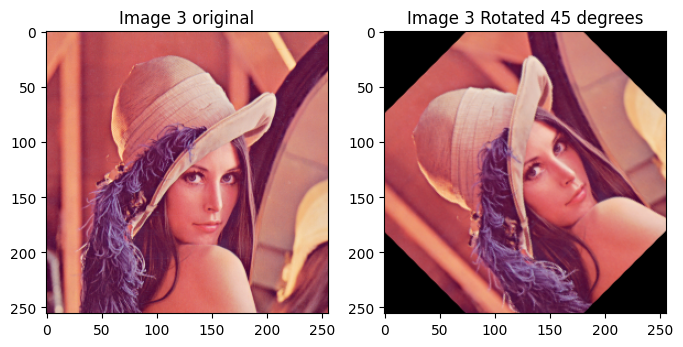

In [12]:
MR = np.float32([[ 0.70710678,0.70710678,-53.01933598],[-0.70710678,0.70710678,128],[0,0,1]])
img_3_rot_45 = cv2.warpPerspective(img_3_rgb, MR, (N,M))
# Imagen original e imagen rotada
plt.figure(figsize= (8, 4))
plt.subplot(121)
plt.title('Image 3 original')
plt.imshow(img_3_rgb)
plt.subplot(122)
plt.title('Image 3 Rotated 45 degrees')
plt.imshow(img_3_rot_45)
plt.show()

b) Rotate image 3 by 180° and adjust its visual plane.

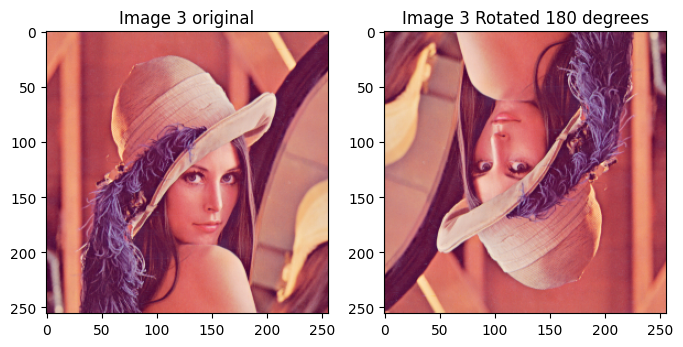

In [13]:
MR = np.float32([[0,-1,256],[1,0,0],[0,0,1]])
img_3_rot_90 = cv2.warpPerspective(img_3_rgb, MR, (N,M))
img_3_rot_180 = cv2.warpPerspective(img_3_rot_90, MR, (N,M))

# Original vs rotated image
plt.figure(figsize= (8, 4))
plt.subplot(121)
plt.title('Image 3 original')
plt.imshow(img_3_rgb)
plt.subplot(122)
plt.title('Image 3 Rotated 180 degrees')
plt.imshow(img_3_rot_180)
plt.show()

c) Scale the image 3 by two in each dimension and adjust its visual plane

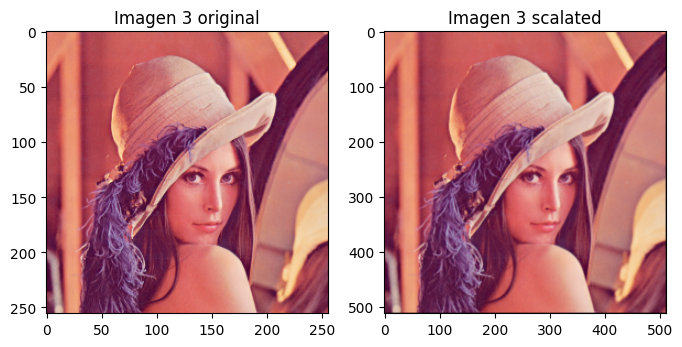

In [14]:
MT = np.float32([[2,0,0],[0,2,0],[0,0,1]])
img_3_scl_2 = cv2.warpPerspective(img_3_rgb, MT, (N*2,M*2))

# Original Image and Scalated Image
plt.figure(figsize= (8, 4))
plt.subplot(121)
plt.title('Imagen 3 original')
plt.imshow(img_3_rgb)
plt.subplot(122)
plt.title('Imagen 3 scalated')
plt.imshow(img_3_scl_2)
plt.show()

d) Scale the image 3 by two in each dimension with the cv2.resize() function, adjust its visual plane and compare the result with manual scaling.

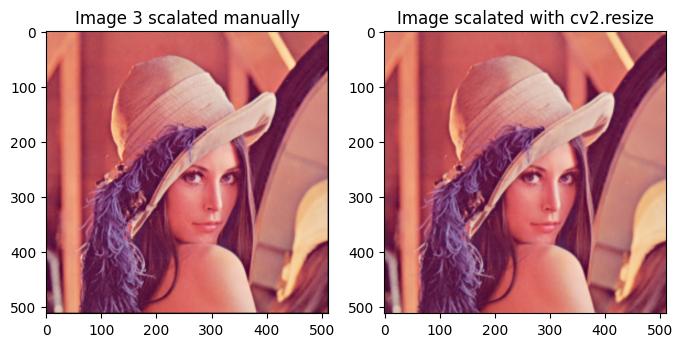

In [15]:
img_3_scl_2_resize = cv2.resize(img_3_rgb, (512,512))

# Image scalated Manually and with resize
plt.figure(figsize= (8, 4))
plt.subplot(121)
plt.title('Image 3 scalated manually')
plt.imshow(img_3_scl_2)
plt.subplot(122)
plt.title('Image scalated with cv2.resize')
plt.imshow(img_3_scl_2_resize)
plt.show()